In [1]:
!pip install --upgrade pip
!pip install --pre pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for pycaret[full] from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/13/c3/e942893f4864a424514c81640f114980cfd5aff7e74

In [2]:
pip install sqlalchemy>=2.0

<img src='https://i1.wp.com/pycaret.org/wp-content/uploads/2020/04/thumbnail.png?fit=1166%2C656&ssl=1' width='500'>

In [3]:
import pandas as pd

In [4]:
!pip install Historic-Crypto
from Historic_Crypto import HistoricalData

new = HistoricalData('BTC-USD',3600,'2020-06-01-00-00','2020-07-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-06-01T00:00:00
Provisional End: 2020-06-13T12:00:00
Data for chunk 1 of 3 extracted
Provisional Start: 2020-06-13T12:00:00
Provisional End: 2020-06-26T00:00:00
Data for chunk 2 of 3 extracted
Provisional Start: 2020-06-26T00:00:00
Provisional End: 2020-07-08T12:00:00
Data for chunk 3 of 3 extracted


In [5]:
data = new

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2,shuffle=False)

In [7]:
train.head()

,low,high,open,close,volume
time,,,,,
2020-06-01 01:00:00,9465.00,9567.13,9496.15,9551.12,482.480925
2020-06-01 02:00:00,9519.63,9564.80,9551.11,9528.77,361.341924
2020-06-01 03:00:00,9510.04,9554.48,9528.58,9548.48,224.188395
2020-06-01 04:00:00,9539.49,9615.00,9550.00,9548.99,437.632609
2020-06-01 05:00:00,9526.39,9563.12,9547.30,9531.69,184.092633


In [ ]:
%%time
from pycaret.regression import *

CPU times: user 1.37 s, sys: 124 ms, total: 1.49 s
Wall time: 2.95 s


In [ ]:
exp_name = setup(data=train,target="close")
cat_model = create_model('catboost')

,Description,Value
0,Session id,4144
1,Target,close
2,Target type,Regression
3,Original data shape,"(576, 5)"
4,Transformed data shape,"(576, 5)"
5,Transformed train set shape,"(403, 5)"
6,Transformed test set shape,"(173, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.8836,538.8330,23.2128,0.9896,0.0024,0.0017
1,17.1663,633.8020,25.1754,0.9782,0.0027,0.0018
2,16.6341,460.8144,21.4666,0.9892,0.0022,0.0017
3,13.3751,440.0272,20.9768,0.9850,0.0022,0.0014
4,19.4904,798.5831,28.2592,0.9819,0.0030,0.0021
5,11.4953,260.2366,16.1319,0.9919,0.0017,0.0012
6,13.6208,359.8603,18.9700,0.9857,0.0020,0.0014
7,17.0679,499.4159,22.3476,0.9859,0.0024,0.0018
8,16.2102,725.5503,26.9360,0.9854,0.0029,0.0017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
pred_holdout = predict_model(cat_model , data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,51.3448,4435.5754,66.6001,0.2381,0.0073,0.0056


In [ ]:
pred_holdout

,low,high,open,volume,close,prediction_label
time,,,,,,
2020-06-25 01:00:00,9256.209961,9295.610352,9256.209961,299.530792,9262.839844,9279.307119
2020-06-25 02:00:00,9210.990234,9272.809570,9262.830078,302.915710,9240.549805,9257.957604
2020-06-25 03:00:00,8979.070312,9242.950195,9240.269531,4020.826660,9083.709961,9196.171005
2020-06-25 04:00:00,9072.019531,9151.000000,9083.709961,1370.661255,9103.690430,9149.833888
2020-06-25 05:00:00,9086.370117,9187.330078,9105.000000,505.938080,9167.309570,9168.374567
...,...,...,...,...,...,...
2020-06-30 20:00:00,9128.059570,9155.360352,9131.009766,218.093445,9148.620117,9188.474403
2020-06-30 21:00:00,9149.110352,9172.000000,9149.120117,296.645264,9162.110352,9196.291827
2020-06-30 22:00:00,9121.559570,9164.209961,9162.110352,223.406250,9129.269531,9188.643589


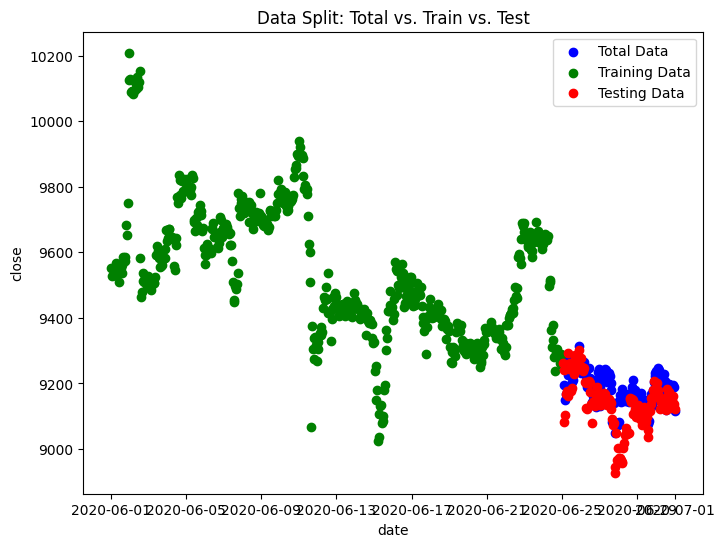

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

In [ ]:
exp_name = setup(data=train,target="close")
cat_model = create_model('gbr')

,Description,Value
0,Session id,6466
1,Target,close
2,Target type,Regression
3,Original data shape,"(576, 5)"
4,Transformed data shape,"(576, 5)"
5,Transformed train set shape,"(403, 5)"
6,Transformed test set shape,"(173, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24.2949,2850.3092,53.3883,0.9337,0.0057,0.0026
1,18.0370,668.8569,25.8623,0.9778,0.0027,0.0019
2,18.6381,686.5207,26.2015,0.9867,0.0028,0.0020
3,16.9551,586.9202,24.2264,0.9869,0.0025,0.0018
4,12.0932,217.2802,14.7404,0.9901,0.0016,0.0013
5,18.9017,676.2236,26.0043,0.9778,0.0027,0.0020
6,17.4046,505.8123,22.4903,0.9817,0.0024,0.0018
7,16.6803,492.4032,22.1902,0.9847,0.0023,0.0018
8,15.5433,442.0714,21.0255,0.9889,0.0022,0.0016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pred_holdout = predict_model(cat_model , data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,48.6254,3768.0443,61.3844,0.3528,0.0067,0.0053


In [ ]:
pred_holdout

,low,high,open,volume,close,prediction_label
time,,,,,,
2020-06-25 01:00:00,9256.209961,9295.610352,9256.209961,299.530792,9262.839844,9282.851074
2020-06-25 02:00:00,9210.990234,9272.809570,9262.830078,302.915710,9240.549805,9264.856852
2020-06-25 03:00:00,8979.070312,9242.950195,9240.269531,4020.826660,9083.709961,9050.502283
2020-06-25 04:00:00,9072.019531,9151.000000,9083.709961,1370.661255,9103.690430,9154.350219
2020-06-25 05:00:00,9086.370117,9187.330078,9105.000000,505.938080,9167.309570,9144.141022
...,...,...,...,...,...,...
2020-06-30 20:00:00,9128.059570,9155.360352,9131.009766,218.093445,9148.620117,9127.576739
2020-06-30 21:00:00,9149.110352,9172.000000,9149.120117,296.645264,9162.110352,9239.619563
2020-06-30 22:00:00,9121.559570,9164.209961,9162.110352,223.406250,9129.269531,9125.268355


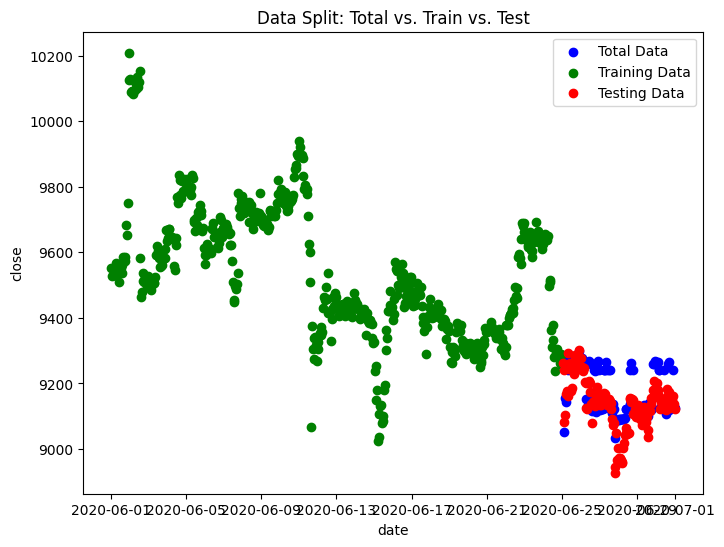

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

In [ ]:
exp_name = setup(data=train,target="close")
cat_model = create_model('xgboost')

,Description,Value
0,Session id,6417
1,Target,close
2,Target type,Regression
3,Original data shape,"(576, 5)"
4,Transformed data shape,"(576, 5)"
5,Transformed train set shape,"(403, 5)"
6,Transformed test set shape,"(173, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.1163,442.8946,21.0451,0.9865,0.0022,0.0017
1,21.4878,880.2242,29.6686,0.9828,0.0031,0.0023
2,16.7648,536.3047,23.1583,0.9804,0.0024,0.0018
3,27.6645,4044.7820,63.5986,0.9172,0.0064,0.0028
4,14.3852,324.0571,18.0016,0.9927,0.0019,0.0015
5,17.2045,589.2165,24.2738,0.9833,0.0026,0.0018
6,14.7889,477.6829,21.8560,0.9885,0.0023,0.0016
7,16.3638,411.3789,20.2825,0.9878,0.0021,0.0017
8,16.7473,852.0433,29.1898,0.9804,0.0031,0.0018


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pred_holdout = predict_model(cat_model , data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,39.0429,2657.9189,51.5550,0.5435,0.0056,0.0043


In [ ]:
pred_holdout

,low,high,open,volume,close,prediction_label
time,,,,,,
2020-06-25 01:00:00,9256.209961,9295.610352,9256.209961,299.530792,9262.839844,9272.986328
2020-06-25 02:00:00,9210.990234,9272.809570,9262.830078,302.915710,9240.549805,9265.398438
2020-06-25 03:00:00,8979.070312,9242.950195,9240.269531,4020.826660,9083.709961,9021.247070
2020-06-25 04:00:00,9072.019531,9151.000000,9083.709961,1370.661255,9103.690430,9152.219727
2020-06-25 05:00:00,9086.370117,9187.330078,9105.000000,505.938080,9167.309570,9153.746094
...,...,...,...,...,...,...
2020-06-30 20:00:00,9128.059570,9155.360352,9131.009766,218.093445,9148.620117,9176.532227
2020-06-30 21:00:00,9149.110352,9172.000000,9149.120117,296.645264,9162.110352,9260.895508
2020-06-30 22:00:00,9121.559570,9164.209961,9162.110352,223.406250,9129.269531,9155.511719


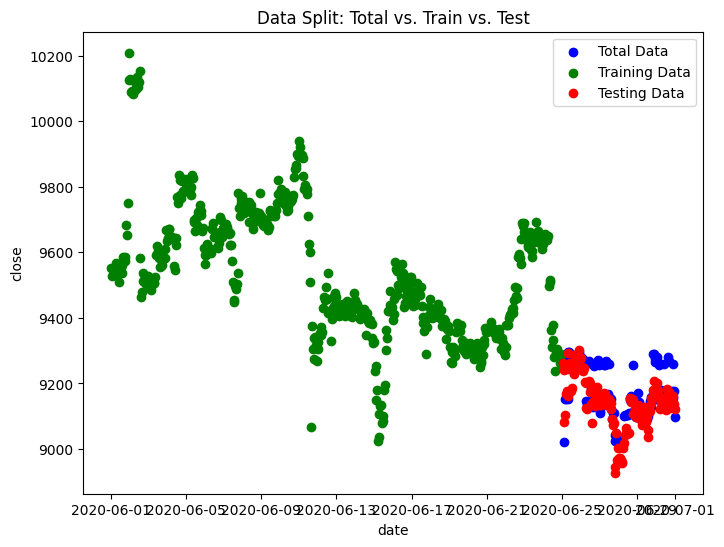

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

In [ ]:
exp_name = setup(data=train,target="close")
cat_model = create_model('lightgbm')

,Description,Value
0,Session id,4764
1,Target,close
2,Target type,Regression
3,Original data shape,"(576, 5)"
4,Transformed data shape,"(576, 5)"
5,Transformed train set shape,"(403, 5)"
6,Transformed test set shape,"(173, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.3925,5128.7707,71.6154,0.8869,0.0074,0.0044
1,19.8936,1222.2890,34.9612,0.9692,0.0036,0.0021
2,34.3403,4154.7689,64.4575,0.8606,0.0069,0.0036
3,32.7613,4158.6373,64.4875,0.9302,0.0065,0.0033
4,27.1185,2106.6237,45.8980,0.9106,0.0048,0.0029
5,29.9171,4432.0313,66.5735,0.8888,0.0067,0.0031
6,22.5323,1592.8654,39.9107,0.9557,0.0042,0.0024
7,20.8812,936.2425,30.5981,0.9711,0.0032,0.0022
8,25.4342,1530.6697,39.1238,0.9529,0.0041,0.0027


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pred_holdout = predict_model(cat_model , data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,73.0778,8903.3027,94.3573,-0.5292,0.0103,0.0080


In [ ]:
pred_holdout

,low,high,open,volume,close,prediction_label
time,,,,,,
2020-06-25 01:00:00,9256.209961,9295.610352,9256.209961,299.530792,9262.839844,9265.844247
2020-06-25 02:00:00,9210.990234,9272.809570,9262.830078,302.915710,9240.549805,9206.064948
2020-06-25 03:00:00,8979.070312,9242.950195,9240.269531,4020.826660,9083.709961,9138.621997
2020-06-25 04:00:00,9072.019531,9151.000000,9083.709961,1370.661255,9103.690430,9138.621997
2020-06-25 05:00:00,9086.370117,9187.330078,9105.000000,505.938080,9167.309570,9189.005802
...,...,...,...,...,...,...
2020-06-30 20:00:00,9128.059570,9155.360352,9131.009766,218.093445,9148.620117,9206.762480
2020-06-30 21:00:00,9149.110352,9172.000000,9149.120117,296.645264,9162.110352,9206.064948
2020-06-30 22:00:00,9121.559570,9164.209961,9162.110352,223.406250,9129.269531,9206.762480


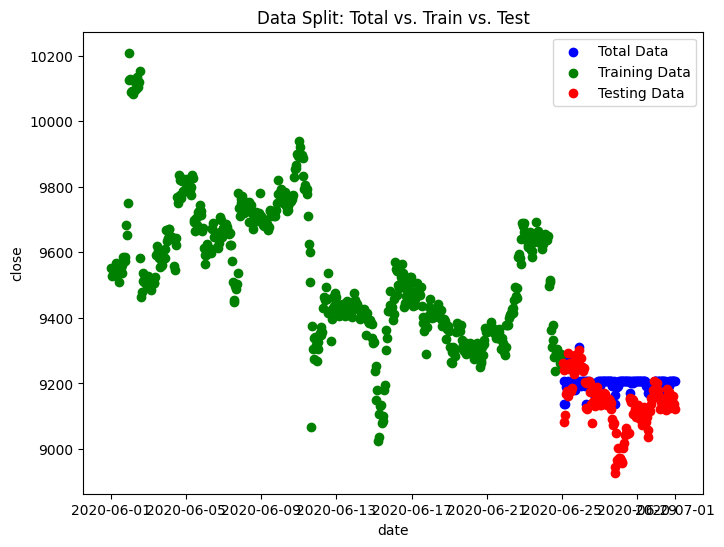

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,13.2683,458.1568,20.8683,0.9866,0.0022,0.0014,0.0480
br,Bayesian Ridge,13.4083,465.5461,20.8859,0.9862,0.0022,0.0014,0.0200
lr,Linear Regression,13.4097,468.1817,20.9507,0.9861,0.0022,0.0014,0.0540
lasso,Lasso Regression,13.4120,467.9828,20.9442,0.9861,0.0022,0.0014,0.0510
ridge,Ridge Regression,13.4096,468.1767,20.9505,0.9861,0.0022,0.0014,0.0940
en,Elastic Net,13.4107,467.6215,20.9364,0.9861,0.0022,0.0014,0.0390
lar,Least Angle Regression,13.4096,468.1768,20.9505,0.9861,0.0022,0.0014,0.0370
llar,Lasso Least Angle Regression,13.4088,466.9454,20.9202,0.9861,0.0022,0.0014,0.0200
gbr,Gradient Boosting Regressor,18.4550,1096.0737,30.5078,0.9690,0.0032,0.0019,0.2780
rf,Random Forest Regressor,17.8555,1097.3336,29.6068,0.9689,0.0031,0.0019,0.2200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
pred_holdout = predict_model(best_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,11.0451,198.7434,14.0976,0.9659,0.0015,0.0012


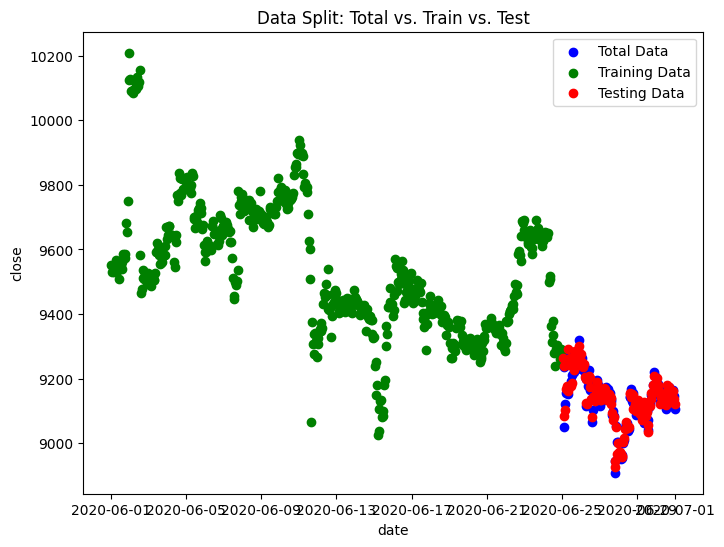

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

In [ ]:
!pip install --pre pycaret[full]

In [1]:
%%time
from pycaret.time_series import *

CPU times: user 4.91 s, sys: 561 ms, total: 5.47 s
Wall time: 12.5 s


In [ ]:
exp_name = setup(data=train,target="close")

,Description,Value
0,session_id,1608
1,Target,close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(576, 5)"
5,Transformed data shape,"(576, 5)"
6,Transformed train set shape,"(575, 5)"
7,Transformed test set shape,"(1, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
exp_name = setup(data=train,target="close")
arima = create_model('gbr_cds_dt')

,Description,Value
0,session_id,918
1,Target,close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(576, 5)"
5,Transformed data shape,"(576, 5)"
6,Transformed train set shape,"(575, 5)"
7,Transformed test set shape,"(1, 5)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2020-06-24 20:00,0.0354,0.0243,5.1518,5.1518,0.0006,0.0006
1,2020-06-24 21:00,0.1574,0.1080,22.9732,22.9732,0.0025,0.0025
2,2020-06-24 22:00,0.1389,0.0954,20.3152,20.3152,0.0022,0.0022
Mean,NaT,0.1106,0.0759,16.1467,16.1467,0.0017,0.0017
SD,NaT,0.0537,0.0369,7.8499,7.8499,0.0008,0.0008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
plot_model(plot = 'ts')
plot_model(plot = 'decomp', data_kwargs = {'type' : 'multiplicative'})
plot_model(plot = 'decomp', data_kwargs = {'seasonal_period': 24})
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 12})

In [ ]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.0552,0.0379,8.0579,8.0579,0.0009,0.0009,0.1800
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.0553,0.0380,8.0711,8.0711,0.0009,0.0009,0.1867
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.0553,0.0379,8.0611,8.0611,0.0009,0.0009,0.1833
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.0554,0.0380,8.0864,8.0864,0.0009,0.0009,0.3667
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.0554,0.0380,8.0864,8.0864,0.0009,0.0009,0.1733
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.0554,0.0380,8.0812,8.0812,0.0009,0.0009,0.1800
auto_arima,Auto ARIMA,0.0773,0.0530,11.2725,11.2725,0.0012,0.0012,360.7233
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0923,0.0633,13.4569,13.4569,0.0014,0.0015,0.9033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.0926,0.0635,13.4897,13.4897,0.0015,0.0015,0.2100
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0942,0.0647,13.7632,13.7632,0.0015,0.0015,0.8233


Processing:   0%|          | 0/105 [00:00<?, ?it/s]

In [ ]:
pred_holdout = predict_model(best_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,Lasso,0.0523,0.0360,7.6691,7.6691,0.0008,0.0008


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Plot total data in blue
plt.scatter(pred_holdout.index, pred_holdout['prediction_label'] ,c='b', label='Total Data')

# # Plot training data in green
plt.scatter(train.index, train['close'], c='g', label='Training Data')

# Plot testing data in red
plt.scatter(test.index, test['close'], c='r', label='Testing Data')

plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.title('Data Split: Total vs. Train vs. Test')
plt.show()

KeyError: ignored

<Figure size 800x600 with 0 Axes>